# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
df = pd.read_csv('imdb_1000.csv')

In [3]:
# show first 5 rows of imdb_df
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [4]:
# load bikes dataset as pandas dataframe
df1 = pd.read_csv('bikes.csv')

In [5]:
# show first 3 rows of bikes_df
df1.head(3)
# df[0:3]

,Date;;Rachel / Papineau;Berri1;Maisonneuve_2;Maisonneuve_1;Brébeuf;Parc;PierDup;CSC (Côte Sainte-Catherine);Pont_Jacques_Cartier
0,01/01/2012;00:00;16;35;51;38;5;26;10;0;27
1,02/01/2012;00:00;43;83;153;68;11;53;6;1;21
2,03/01/2012;00:00;58;135;248;104;2;89;3;2;15


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [6]:
# list columns of imdb_df
df.columns


Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [7]:
# what are the datatypes of values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 30.7+ KB


In [8]:
# list first 5 movie titles
df.loc[0:4,'title']
# type(df.loc[0:4,'title'])

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [9]:
# show only movie title and genre
df.loc[0:4,['title','genre']]
# type(df.loc[0:4,['title','genre']])

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [10]:
# show the type of duration column
# type(df['duration'])
df['duration'].dtype

dtype('int64')

In [11]:
# show duration values of movies as numpy arrays
df['duration'].values

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [12]:
# convert all the movie titles to uppercase

def up(cell):
        return cell.upper()
# convert all the movie titles to uppercase

df['title']=df['title'].apply(up)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,POLTERGEIST,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Plotting a column

Use ``.plot()`` function!

In [34]:
# plot the bikers travelling to Berri1 over the year

import matplotlib.pyplot as plt
df1=pd.read_csv(r'bikes.csv',sep=";")
df1['Berri1'].plot()
plt.show()

<Figure size 640x480 with 1 Axes>

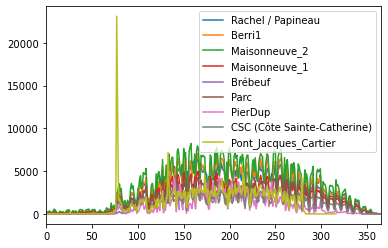

In [35]:
# plot all the columns of bikes_df
df1.plot()
plt.show()

## Value counts

Get count of unique values in a particular column/Series.

In [36]:
# what are the unique genre in imdb_df?
a=df['genre'].value_counts()
a

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

<AxesSubplot:>

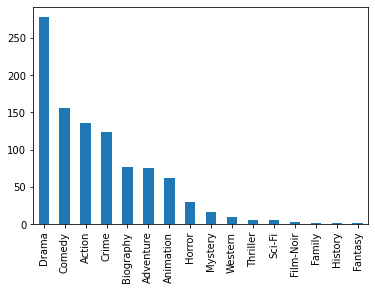

In [37]:
# plotting value counts of unique genres as a bar chart
import matplotlib.pyplot as plt
a=df['genre'].value_counts()
a.plot.bar()

<AxesSubplot:ylabel='genre'>

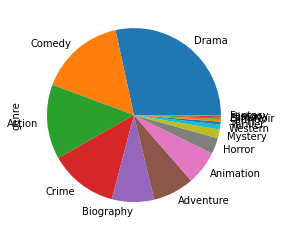

In [38]:
# plotting value counts of unique genres as a pie chart
a.plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [18]:
# show index of bikes_df
df1.index

RangeIndex(start=0, stop=366, step=1)

In [39]:
# get row for date 2012-01-01
df1['Date'] = pd.to_datetime(df1['Date'])
df1=df1.set_index('Date')
df1.loc['2012-01-01']

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [40]:
# show 11th row of imdb_df using iloc
df.iloc[11]

star_rating                                                     8.8
title                                                     INCEPTION
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [41]:
# select only those movies where genre is adventure

df[df['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,THE LORD OF THE RINGS: THE RETURN OF THE KING,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,THE LORD OF THE RINGS: THE TWO TOWERS,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,INTERSTELLAR,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,BACK TO THE FUTURE,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,TRUE GRIT,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,LABYRINTH,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,THE BUCKET LIST,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,THE NEVERENDING STORY,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [44]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?

newdf =df[df['star_rating']>8] [df['duration']>130]
newdf['genre'].value_counts().head()

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [45]:
# add a weekday column to bikes_df
df1.insert(2,"weekday","yes")

## Deleting an existing column from DataFrame

In [46]:
# remove column 'Unnamed: 1' from bikes_df
df1["weekday"]="yes"
df1
df1.drop(columns="Unnamed: 1")

,Rachel / Papineau,weekday,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,16,yes,35,51,38,5.0,26,10,0,27.0
2012-02-01,43,yes,83,153,68,11.0,53,6,1,21.0
2012-03-01,58,yes,135,248,104,2.0,89,3,2,15.0
2012-04-01,61,yes,144,318,116,2.0,111,8,1,19.0
2012-05-01,95,yes,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,8,yes,12,7,4,NaN,1,2,0,NaN
2012-12-28,0,yes,35,3,38,NaN,0,0,0,NaN
2012-12-29,0,yes,27,8,42,NaN,9,0,0,NaN


## Deleting a row in DataFrame

In [47]:
# remove row no. 1 from bikes_df

df1.drop(df1.index[0])

,Unnamed: 1,Rachel / Papineau,weekday,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,,
2012-02-01,00:00,43,yes,83,153,68,11.0,53,6,1,21.0
2012-03-01,00:00,58,yes,135,248,104,2.0,89,3,2,15.0
2012-04-01,00:00,61,yes,144,318,116,2.0,111,8,1,19.0
2012-05-01,00:00,95,yes,197,330,124,6.0,97,13,2,16.0
2012-06-01,00:00,75,yes,146,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,yes,12,7,4,NaN,1,2,0,NaN
2012-12-28,00:00,0,yes,35,3,38,NaN,0,0,0,NaN
2012-12-29,00:00,0,yes,27,8,42,NaN,9,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [48]:
# group imdb_df by movie genres
gener=df.groupby('genre')
gener.first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,THE DARK KNIGHT,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,THE LORD OF THE RINGS: THE RETURN OF THE KING,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,SPIRITED AWAY,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,SCHINDLER'S LIST,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,LIFE IS BEAUTIFUL,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,THE SHAWSHANK REDEMPTION,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 ANGRY MEN,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. THE EXTRA-TERRESTRIAL,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,THE CITY OF LOST CHILDREN,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [49]:
# get crime movies group
gener.get_group('Crime')

,star_rating,title,content_rating,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,PULP FICTION,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,CITY OF GOD,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...
927,7.5,BRICK,R,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,MEAN STREETS,R,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,BOUND,R,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,LAW ABIDING CITIZEN,R,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [50]:
# get mean of movie durations for each group
gener['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [53]:
# change duration of all movies in a particular genre to mean duration of the group

# import numpy as np
# gener.aggregate(gener['duration'].mean())

In [30]:
# drop groups/genres that do not have average movie duration greater than 120.

In [54]:
# group weekday wise bikers count
df1

,Unnamed: 1,Rachel / Papineau,weekday,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,,
2012-01-01,00:00,16,yes,35,51,38,5.0,26,10,0,27.0
2012-02-01,00:00,43,yes,83,153,68,11.0,53,6,1,21.0
2012-03-01,00:00,58,yes,135,248,104,2.0,89,3,2,15.0
2012-04-01,00:00,61,yes,144,318,116,2.0,111,8,1,19.0
2012-05-01,00:00,95,yes,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,yes,12,7,4,NaN,1,2,0,NaN
2012-12-28,00:00,0,yes,35,3,38,NaN,0,0,0,NaN
2012-12-29,00:00,0,yes,27,8,42,NaN,9,0,0,NaN


In [32]:
# get weekday wise biker count

In [33]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)